In [ ]:
# Setup FastAI
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 16.8MB/s 
     |████████████████████████████████| 1.2MB 43.8MB/s 
     |████████████████████████████████| 204kB 50.8MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
Mounted at /content/gdrive


[a] - a number denoting the plastic type;

[b] - colour;

[c] - type of light;

[d] - the deformation level;

[e] - the level of a dirt;

[f] - presence of a screw cap or a lid;

[g] - presence of a ring - characteristic for the bottles with a screw caps;

[h] - order number of a random position of a photographed object.

In [ ]:
# Load data
import os
from google.colab import drive
drive.mount("/content/drive")
data_dir ='/content/drive/My Drive/training_and_testing_data/full_dataset'

Mounted at /content/drive


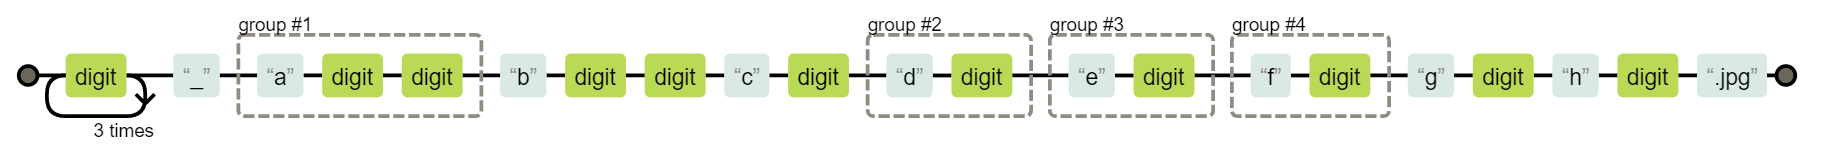

In [ ]:
from fastai.vision.all import *

path = Path(data_dir)
fnames = get_image_files(path)

import re

# plastic type, deformation, dirtiness, has_lid_or_cap 
pattern = re.compile(r'\d{4}_(a\d\d)b\d\dc\d(d\d)(e\d)(f\d)g\dh\d\.jpg')
def get_y(x):
  y =  list(x for x in pattern.search(str(x)).groups())
  return y

get_y(fnames[0])

['a02', 'd0', 'e0', 'f1']

In [ ]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)
item_tfms = [Resize(224, method='crop')]
batch_tfms=[*aug_transforms(size=256), Normalize.from_stats(*imagenet_stats)]
blocks = (ImageBlock, MultiCategoryBlock)
block = DataBlock(blocks=blocks,
                  get_items=get_image_files,
                  get_y=get_y,
                  splitter=splitter,
                  item_tfms=item_tfms,
                  batch_tfms=batch_tfms,)
block

In [ ]:
dls = block.dataloaders(path, bs=64)
dls


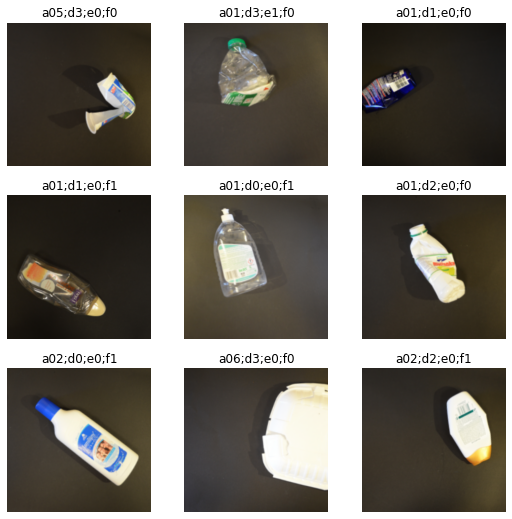

In [ ]:
dls.show_batch()

In [ ]:
# learn = cnn_learner(dls, resnet34, metrics=accuracy_multi)
learn = load_learner("/content/drive/My Drive/models/plastic_2")
learn.dls = dls

In [ ]:
# learn.fit(5, 0.015)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.503368,0.404147,0.829712,05:30
1,0.372379,0.272845,0.879904,03:17
2,0.306617,0.250372,0.889712,03:19
3,0.265902,0.233122,0.894423,03:20
4,0.242402,0.235598,0.890096,03:19


In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.151310,0.163631,0.923558,03:25


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.166057,0.142453,0.933750,03:29


In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.151814,0.133813,0.935769,03:24


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.147799,0.134633,0.935962,03:27
1,0.148411,0.166309,0.924712,03:27
2,0.136841,0.120018,0.944615,03:26
3,0.123351,0.103593,0.952596,03:27
4,0.109425,0.096934,0.958365,03:35


In [ ]:
learn.export("/content/drive/My Drive/models/plastic_4")

In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.101312,0.095472,0.957500,03:25


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.101584,0.117692,0.946154,03:23
1,0.107335,0.114820,0.946058,03:19
2,0.103759,0.104738,0.953365,03:19
3,0.091887,0.083560,0.963077,03:19
4,0.079934,0.079454,0.965577,03:19


In [ ]:
# learn.fit(5, 1e-7)  # Oops, picked a bad LR based on the above. Meant to get that slope a bit to the right of 1e-7


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.214285,0.201149,0.909423,03:15
1,0.215852,0.201222,0.909327,03:15
2,0.216099,0.201958,0.909519,03:17
3,0.214709,0.201965,0.908750,03:18
4,0.213931,0.201758,0.908173,03:19


(8.31763736641733e-07, 6.918309736647643e-06)

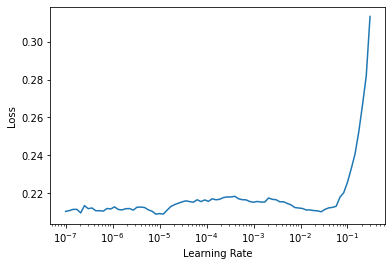

In [ ]:
# lr_min, lr_steep = learn.lr_find()
# lr_min, lr_steep

In [ ]:
# learn.fit(5, 9e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.189852,0.161329,0.926250,03:14
1,0.177329,0.154461,0.928173,03:12
2,0.171505,0.147869,0.933269,03:12
3,0.163517,0.144728,0.935096,03:13
4,0.159434,0.141963,0.933942,03:13


In [ ]:
# learn.export("/content/drive/My Drive/models/plastic_1")

In [ ]:
def pretty_class(cls):
  t = cls[0]
  d = cls[1:]
  if t == 'a':
    return f'Plastic type: ({int(d)}) ' + {
        '00': 'missing or unreadable identifier',
        '01': 'PET - polyethylene terephthalate',
        '02': 'PE-HD - high-density polyethylene',
        '03': 'PVC - polyvinyl chloride',
        '04': 'PE-LD - low-density polyethylene',
        '05': 'PP - polypropylene',
        '06': 'PS - polystyrene',
        '07': 'Other'}[d]
  elif t == 'd':
    return 'Deformation: ' + {
        '0': 'undeformed',
        '1': 'small deformation',
        '2': 'medium deformation',
        '3': 'high deformation'}[d]
  elif t == 'e':
    return 'Dirtiness: ' + {
        '0': 'clean',
        '1': 'small dirt',
        '2': 'medium dirt',
        '3': 'high dirt'}[d]
  elif t == 'f':
    return f'Screw or cap lid: ' + {
        '0': 'lack',
        '1': 'occurs'}[d]
  return cls


In [ ]:
# from fastai.vision.widgets import *
# btn_upload = widgets.FileUpload()
from google.colab import files
btn_upload = files.upload()

Saving 5405876_071919-wtvd-water-bottle-generic-img.jpg to 5405876_071919-wtvd-water-bottle-generic-img (3).jpg


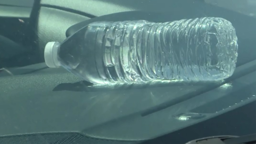

In [ ]:
data = next(x for x in btn_upload.values())
img = PILImage.create(data)
display(img.to_thumb(256,256))

In [ ]:
pred, pred_idx, probs = learn.predict(img)
[pretty_class(cls) for cls in pred]

['Plastic type: (1) PET - polyethylene terephthalate',
 'Deformation: small deformation',
 'Dirtiness: clean',
 'Screw or cap lid: occurs']

(0.0001737800776027143, 8.31763736641733e-06)

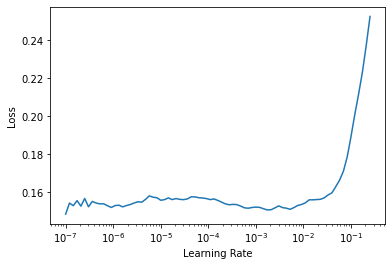

In [ ]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [ ]:
learn.fit(5, .8e-7)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.151666,0.141326,0.934904,03:15
1,0.151461,0.141424,0.934423,03:14
2,0.154069,0.141353,0.934327,03:13
3,0.153836,0.141463,0.935385,03:11
4,0.152569,0.141165,0.933846,03:12


In [ ]:
def pretty_class(cls):
  t = cls[0]
  d = cls[1:]
  if t == 'a':
    return f'Plastic type: ({int(d)}) ' + {
        '00': 'missing or unreadable identifier',
        '01': 'PET - polyethylene terephthalate',
        '02': 'PE-HD - high-density polyethylene',
        '03': 'PVC - polyvinyl chloride',
        '04': 'PE-LD - low-density polyethylene',
        '05': 'PP - polypropylene',
        '06': 'PS - polystyrene',
        '07': 'Other'}[d]
  elif t == 'd':
    return 'Deformation: ' + {
        '0': 'undeformed',
        '1': 'small deformation',
        '2': 'medium deformation',
        '3': 'high deformation'}[d]
  elif t == 'e':
    return 'Dirtiness: ' + {
        '0': 'clean',
        '1': 'small dirt',
        '2': 'medium dirt',
        '3': 'high dirt'}[d]
  elif t == 'f':
    return f'Screw or cap lid: ' + {
        '0': 'lack',
        '1': 'occurs'}[d]
  return cls


def upload_and_predict():
  from google.colab import files
  btn_upload = files.upload()
  data = next(x for x in btn_upload.values())
  img = PILImage.create(data)
  display(img.to_thumb(256,256))
  pred, pred_idx, probs = learn.predict(img)
  print([pretty_class(cls) for cls in pred])
  return pred, pred_idx, probs

Saving plastic-water-bottle-reuse-1008x567.jpg to plastic-water-bottle-reuse-1008x567.jpg


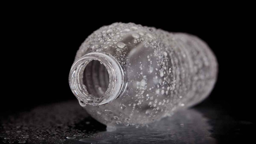

['Plastic type: (1) PET - polyethylene terephthalate', 'Deformation: high deformation', 'Dirtiness: clean', 'Screw or cap lid: lack']


((#4) ['a01','d3','e0','f0'],
 tensor([ True, False, False, False, False, False, False, False,  True,  True, False,  True, False]),
 tensor([9.9986e-01, 7.3382e-06, 9.0204e-07, 1.8750e-07, 6.1122e-10, 1.3526e-03, 6.0609e-03, 3.8380e-02, 9.2069e-01, 1.0000e+00, 5.5105e-11, 1.0000e+00, 2.4106e-06]))

In [ ]:
upload_and_predict()

In [ ]:
# learn.fit(10, .8e-8)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.150625,0.141301,0.933750,03:11
1,0.152235,0.141769,0.933077,03:11
2,0.153648,0.141905,0.934615,03:11
3,0.152776,0.141443,0.935289,03:12
4,0.152355,0.141337,0.934808,03:17
5,0.154480,0.141447,0.933846,03:25
6,0.153121,0.142506,0.935000,03:28
7,0.153842,0.141377,0.934519,03:24
8,0.152452,0.141168,0.934135,03:23
9,0.152481,0.141885,0.934423,03:23


In [ ]:
# learn.export("/content/drive/My Drive/models/plastic_2")

In [ ]:
learn.fine_tune(3)

NameError: ignored

In [ ]:
def pretty_class(cls):
  t = cls[0]
  d = cls[1:]
  if t == 'a':
    return f'Plastic type: ({int(d)}) ' + {
        '00': 'missing or unreadable identifier',
        '01': 'PET - polyethylene terephthalate',
        '02': 'PE-HD - high-density polyethylene',
        '03': 'PVC - polyvinyl chloride',
        '04': 'PE-LD - low-density polyethylene',
        '05': 'PP - polypropylene',
        '06': 'PS - polystyrene',
        '07': 'Other'}[d]
  elif t == 'd':
    return 'Deformation: ' + {
        '0': 'undeformed',
        '1': 'small deformation',
        '2': 'medium deformation',
        '3': 'high deformation'}[d]
  elif t == 'e':
    return 'Dirtiness: ' + {
        '0': 'clean',
        '1': 'small dirt',
        '2': 'medium dirt',
        '3': 'high dirt'}[d]
  elif t == 'f':
    return f'Screw or cap lid: ' + {
        '0': 'lack',
        '1': 'occurs'}[d]
  return cls


def upload_and_predict():
  from google.colab import files
  btn_upload = files.upload()
  data = next(x for x in btn_upload.values())
  img = PILImage.create(data)
  display(img.to_thumb(256,256))
  pred, pred_idx, probs = learn.predict(img)
  print([pretty_class(cls) for cls in pred])
  return pred, pred_idx, probs

Saving 20210508_194600.jpg to 20210508_194600.jpg


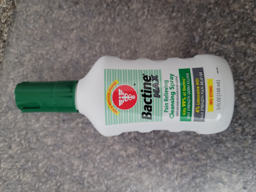

['Plastic type: (2) PE-HD - high-density polyethylene', 'Deformation: high deformation', 'Dirtiness: clean', 'Screw or cap lid: lack']


((#4) ['a02','d3','e0','f0'],
 tensor([False,  True, False, False, False, False, False, False,  True,  True, False,  True, False]),
 tensor([1.2561e-03, 9.2556e-01, 5.8636e-08, 9.1311e-06, 2.0918e-08, 4.9459e-01, 4.5071e-03, 1.0931e-03, 9.8451e-01, 1.0000e+00, 2.3288e-11, 9.9907e-01, 9.6451e-04]))

In [ ]:
upload_and_predict()

Saving 20210508_194907.jpg to 20210508_194907.jpg


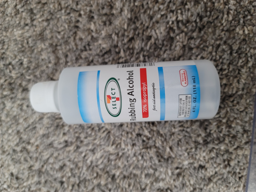

['Plastic type: (2) PE-HD - high-density polyethylene', 'Deformation: high deformation', 'Dirtiness: clean', 'Screw or cap lid: lack']


((#4) ['a02','d3','e0','f0'],
 tensor([False,  True, False, False, False, False, False, False,  True,  True, False,  True, False]),
 tensor([7.7288e-04, 8.2919e-01, 2.8030e-09, 7.9487e-05, 4.6630e-08, 1.6373e-01, 1.4754e-04, 2.0896e-05, 9.9988e-01, 1.0000e+00, 6.9091e-11, 9.9900e-01, 1.0264e-03]))

In [ ]:
upload_and_predict()

In [ ]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.070467,0.077243,0.966923,03:21


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.072016,0.076363,0.963846,03:20
1,0.068738,0.077740,0.966250,03:20
2,0.069245,0.079537,0.964808,03:21
3,0.068815,0.101090,0.960673,03:19
4,0.073636,0.106526,0.954808,03:20
5,0.079204,0.096481,0.958269,03:20
6,0.076419,0.082450,0.964038,03:24
7,0.068312,0.073542,0.970865,03:20
8,0.062415,0.065362,0.974519,03:20
9,0.054027,0.069071,0.973846,03:20


In [ ]:
learn.export("/content/drive/My Drive/models/plastic_5")

Saving 1_hand_soap.jpg to 1_hand_soap.jpg


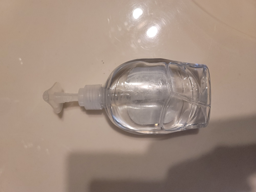

['Plastic type: (1) PET - polyethylene terephthalate', 'Deformation: small deformation', 'Dirtiness: clean', 'Screw or cap lid: lack']


((#4) ['a01','d1','e0','f0'],
 tensor([ True, False, False, False, False, False,  True, False, False,  True, False,  True, False]),
 tensor([9.9736e-01, 5.2339e-04, 4.3275e-03, 1.9326e-03, 3.5796e-05, 1.8807e-02, 8.9147e-01, 4.1997e-02, 5.0526e-02, 9.9257e-01, 7.7895e-03, 9.8124e-01, 1.8964e-02]))

In [ ]:
upload_and_predict()


Saving 20210508_200045.jpg to 20210508_200045.jpg


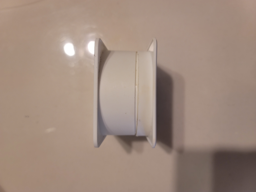

['Plastic type: (6) PS - polystyrene', 'Dirtiness: clean', 'Screw or cap lid: lack']


((#3) ['a06','e0','f0'],
 tensor([False, False, False,  True, False, False, False, False, False,  True, False,  True, False]),
 tensor([5.0462e-03, 3.4348e-04, 5.8382e-05, 9.9915e-01, 8.9131e-06, 3.8440e-01, 4.7551e-01, 9.8670e-03, 3.7482e-02, 9.9985e-01, 1.5272e-04, 8.9717e-01, 1.0622e-01]))

In [ ]:
upload_and_predict()


Saving hairspray.jpg to hairspray.jpg


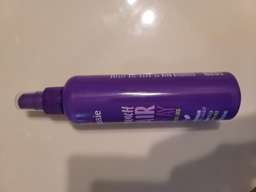

['Plastic type: (2) PE-HD - high-density polyethylene', 'Deformation: undeformed', 'Dirtiness: clean', 'Screw or cap lid: occurs']


((#4) ['a02','d0','e0','f1'],
 tensor([False,  True, False, False, False,  True, False, False, False,  True, False, False,  True]),
 tensor([5.7142e-05, 9.9892e-01, 4.5733e-07, 2.8565e-04, 2.3357e-05, 9.0295e-01, 2.9553e-02, 1.2290e-02, 3.7235e-02, 9.9997e-01, 2.7695e-05, 2.0159e-06, 1.0000e+00]))

In [ ]:
upload_and_predict()


In [ ]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.016915,0.038367,0.986923,03:18


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.021408,0.046418,0.983173,03:22
1,0.030311,0.120786,0.964519,03:23
2,0.050567,0.082187,0.968942,03:24
3,0.043948,0.066989,0.975385,03:24
4,0.036541,0.064693,0.975865,03:24
5,0.028637,0.049451,0.982116,03:24
6,0.022955,0.041449,0.985096,03:24
7,0.019200,0.041051,0.985673,03:25


In [ ]:
learn.fine_tune(100)
learn.export("/content/drive/My Drive/models/plastic_6")

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.017644,0.041406,0.986442,03:19


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.018715,0.049680,0.984039,03:24
1,0.016302,0.044342,0.984327,03:24
2,0.017424,0.044151,0.986442,03:22
3,0.016211,0.043720,0.986154,03:21
4,0.014820,0.043688,0.986346,03:19
5,0.015786,0.046436,0.984615,03:19
6,0.015755,0.043303,0.984712,03:19
7,0.014546,0.047602,0.984808,03:22
8,0.015714,0.055098,0.983942,03:23
9,0.017057,0.052082,0.983846,03:23


In [ ]:
learn = load_learner("/content/drive/My Drive/models/plastic_5")
learn.dls = dls

RuntimeError: ignored

In [ ]:
learn.fine_tune(5)
learn.export("/content/drive/My Drive/models/plastic_6")

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.018912,0.031857,0.990000,28:42


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.026073,0.056298,0.981731,37:46


KeyboardInterrupt: ignored